# Sea Level Rise and New York City

#### *Jacob Basinger and Lucia Rossignol*

In this notebook we will be examining how population statistics have changed in New York City census tracts from 2010 to 2020, and analyzing whether vulnerabilities to sea level rise induced floods have any relationships with those changes.

## Research Question

How does projected flooding due to sea level rise impact New York City's population and real estate market?

## Data Sources

For this notebook we are utilizing two data sources.
1. Census Data

The NYC OpenData portal has an excel file available that contains the 2010 and 2020 census population data, as well as columns with the population change information already calculated.  We combined this data with census tract geographies, also obtained from the NYC OpenData portal, then joined them into a workable geojson.  The full data cleaning can be seen here: https://github.com/jjbasinger/up206a_groupproject/blob/main/Group%20Assignments/week%204%20assignment%20jacob.ipynb.

2. Sea Level Rise Data

We obtained sea level rise data from the NYC OpenData portal as well. Instead of utilizing mean high tide data, which only shows a few inches of rise and would not be very informative in a map of the entire city, we decided to use flood projections for various levels of storms (which also incorporate the rises in mean high tide). We chose to use 100 year flood and 500 year flood data because Hurricane Sandy was a 260 year storm (https://www.businessinsider.com/another-hurricane-sandy-flood-risk-hit-new-york-2016-10), therefore these visualizations will show flood events that are similar. We chose to use the 2020 projections instead of 2050s or 2100s because it is temporally sooner, and we believe people may be more likely to respond to situations that they feel are more imminent.

## Data Exploration and Analysis

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

First we imported the necessary libraries.  Then, we added the data on census tract geographies and sea level rise.

In [2]:
fullctd = gpd.read_file('../up206a_groupproject/currentdata/fullcensustractdata.geojson')
floodplain100yr = gpd.read_file('../up206a_groupproject/currentdata/Sea Level Rise Maps (2020s 100-year Floodplain).geojson')
floodplain500yr = gpd.read_file('../up206a_groupproject/currentdata/Sea Level Rise Maps (2020s 500-year Floodplain).geojson')

In [3]:
fullctd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 37 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Neighborhood Name                                         2325 non-null   object  
 1   GeoID                                                     2325 non-null   object  
 2   Shape__Area                                               2325 non-null   float64 
 3   Shape__Length                                             2325 non-null   float64 
 4   GeoType                                                   2325 non-null   object  
 5   Borough                                                   2325 non-null   object  
 6   Population Change                                         2325 non-null   int64   
 7   Population Percent Change                                 2267 non-null   float64 
 8   

In [4]:
fullctd.sample(3)

,Neighborhood Name,GeoID,Shape__Area,Shape__Length,GeoType,Borough,Population Change,Population Percent Change,Household Population Change,Household Population Percent Change,...,Other Race Population Percent Change,Non-Hispanic Two or More Races Population Change,Non-Hispanic Two or More Races Population Percent Change,Total Change in Housing Units,Percent Change in Housing Units,Total Change in Occupied Housing Units,Percent Change in Occupied Housing Units,Total Change in Vacant Housing Units,Percent Change in Vacant Housing Units,geometry
1323,Central Park,36061014300,3.831241e+07,32720.992316,CT2020,Manhattan,104,416.0,17,NaN,...,400.0,9,NaN,5,NaN,5,NaN,0,NaN,"POLYGON ((-73.95246 40.79825, -73.95238 40.798..."
718,Gravesend (East)-Homecrest,36047039600,1.757819e+06,5569.960230,CT2020,Brooklyn,-178,-8.4,-178,-8.4,...,100.0,31,442.9,-162,-17.1,-30,-4.1,-132,-59.5,"POLYGON ((-73.96738 40.59547, -73.96830 40.595..."
560,Borough Park,36047023000,1.624924e+06,8320.930629,CT2020,Brooklyn,-73,-1.6,-73,-1.6,...,1814.3,0,0.0,7,0.6,-36,-3.3,43,51.8,"POLYGON ((-73.98409 40.63931, -73.98467 40.638..."


## Map Visualizations

Below, we plotted the census tracts that have decreased in population since 2010, with the yellow, orange, and red colors representing different percentages of population change.  Since we are mostly concerned with whether or not people are moving out of the areas that are most vulnerable to sea level rise, we decided to only plot those census tracts where the percentage population change was less than zero. We then layered the 100 year floodplain scenario and the 500 year floodplain scenario on top in side by side subplots to see if there is any correlation.

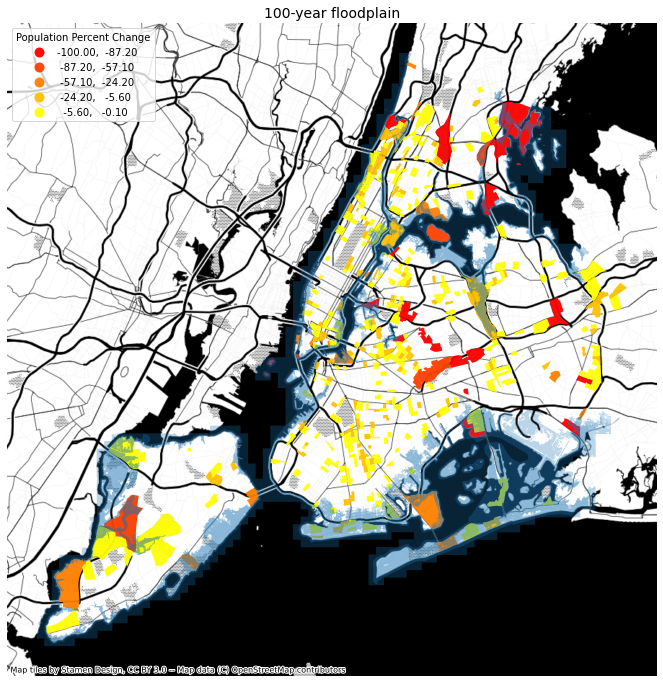

In [5]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax1 = ax

fullctd[fullctd['Population Percent Change'] < 0].to_crs(epsg=3857).plot(
        column='Population Percent Change',
        ax=ax1,
        cmap='autumn',
        scheme='natural_breaks',
        legend=True,
        legend_kwds={'loc': 'upper left', 'title': 'Population Percent Change'},
        alpha=0.95)

floodplain100yr.to_crs(epsg=3857).plot(
        ax=ax1,
        alpha=0.3)

ax1.axis('off')
    
ax1.set_title('100-year floodplain',fontsize=14)

ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerBackground)

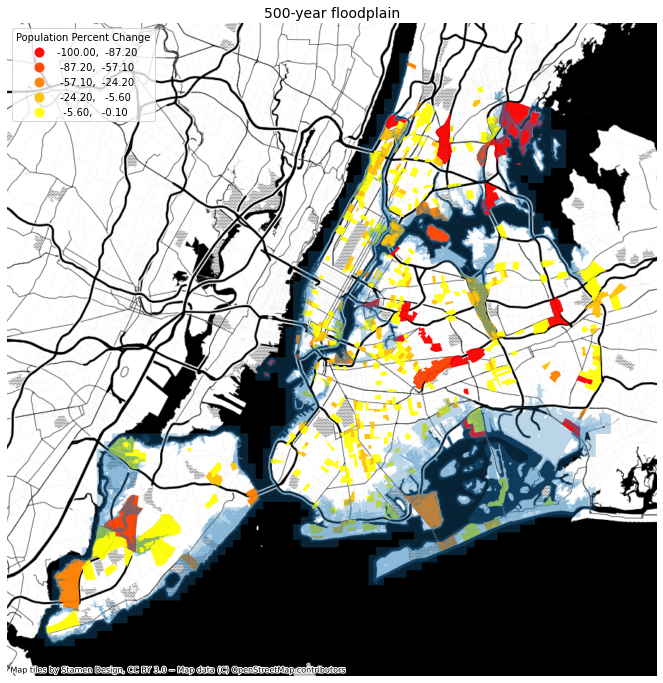

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax1 = ax

fullctd[fullctd['Population Percent Change'] < 0].to_crs(epsg=3857).plot(
        column='Population Percent Change',
        ax=ax1,
        cmap='autumn',
        scheme='natural_breaks',
        legend=True,
        legend_kwds={'loc': 'upper left', 'title': 'Population Percent Change'},
        alpha=0.95)

floodplain500yr.to_crs(epsg=3857).plot(
        ax=ax1,
        alpha=0.3)

ax1.axis('off')
    
ax1.set_title('500-year floodplain',fontsize=14)

ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerBackground)

For comparison's sake, below see a map of census tracts with increased population and the 100-year floodplain overlaid.

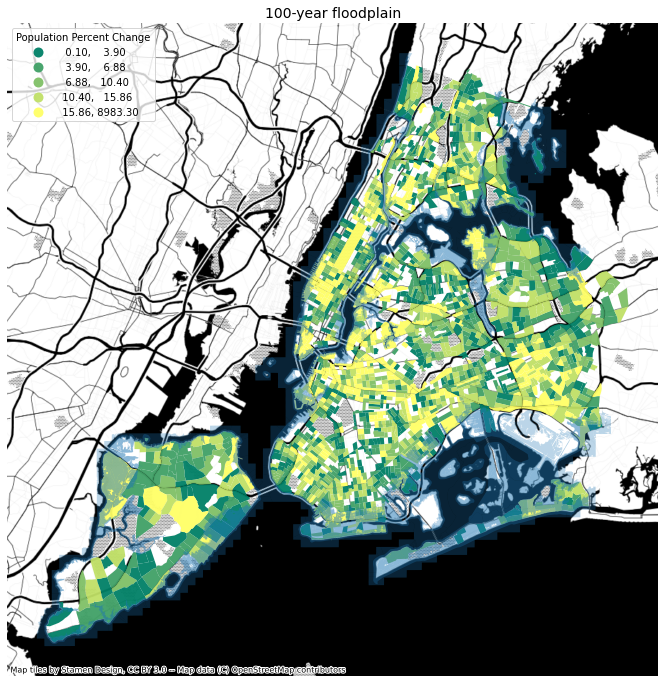

In [13]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax1 = ax

fullctd[fullctd['Population Percent Change'] > 0].to_crs(epsg=3857).plot(
        column='Population Percent Change',
        ax=ax1,
        cmap='summer',
        scheme='quantiles',
        legend=True,
        legend_kwds={'loc': 'upper left', 'title': 'Population Percent Change'},
        alpha=0.95)

floodplain100yr.to_crs(epsg=3857).plot(
        ax=ax1,
        alpha=0.3)

ax1.axis('off')
    
ax1.set_title('100-year floodplain',fontsize=14)

ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerBackground)

As you can see in the maps outputted above, it does not appear that there is a correlation between projected sea level rise and population change.  In other words, the areas that are most vulnerable to sea level rise and flood events are not experiencing the most population loss.  While there are census tracts that have negative population change, most of the areas with projected flooding are not losing population.  It appears that there are other confounding variables that are likely having an impact on where populations are changing.

#### Interactive Map

The following cells are from where we created the interactive map through KeplerGL.  The code ran and produced the maps that are in our presentation, but we decided to not have them run/leave them in raw format in this file due to memory constraints.

We made two interactive maps: 
- a three-dimensional map that shows the change in housing units in each census tract, represented by the height of each tract (https://github.com/jjbasinger/up206a-jacob/blob/main/nyc_housing_units.html)
- a two dimensional map with a choropleth of the change in occupied housing units in each census tract with toggleable layers to show both the 100 year and 500 year flooplain on top (https://github.com/jjbasinger/up206a-jacob/blob/main/nyc_housing_and_flooding.html)

Once again, it does not appear that there is a strong relationship between the projected flood levels and the census tract data, meaning there is no perceivable impact.

In [ ]:
from keplergl import KeplerGl

map = KeplerGl(height=600,width=800)

map.add_data(data=fullctd, name='census tracts')

map.add_data(data=floodplain500yr, name='500 yr floodplain')

map.add_data(data=floodplain100yr, name='100 yr floodplain')

map

**Division of Labor**
- Jacob: Project Proposal Update, data collection and cleaning, "Data Sources" section, "Map Visualizations" Section (and Kepler map creation)
- Lucia: "Data Exploration and Analysis" section